In [23]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
data=pd.read_csv('data/train.csv')

In [24]:
data=data.sample(5000)

In [25]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

In [26]:
vectorizer=TfidfVectorizer(stop_words=stop_words,use_idf=True,ngram_range=(1,3))

In [27]:
X=vectorizer.fit_transform(data.question1)

In [30]:
from sklearn.decomposition import TruncatedSVD,

In [31]:
lsa=TruncatedSVD(n_components=30,n_iter=100)
lsa.fit(X)

In [39]:
lsa.components_.shape

(30, 44270)

In [35]:
terms=vectorizer.get_feature_names()

In [ ]:
for i,comp in enumerate(lsa.components_):
    termincompnent=zip(terms,comp)
    sortedterms=sorted(termincompnent ,key=lambda x:x[1],reverse=True)[:10]
    print("concept :",i)
    for term in sortedterms:
        print(term[0])

In [48]:
x=lsa.transform(X)

In [52]:
import seaborn as sns

In [54]:
cmap = sns.cubehelix_palette(as_cmap=True, rot=-.3, light=1)

In [69]:
from sklearn.cluster import KMeans
cluster_range = range( 1, 50 )
cluster_errors = []

for num_clusters in cluster_range:
    clusters = KMeans( num_clusters )
    clusters.fit( x )
    cluster_errors.append( clusters.inertia_ )

In [70]:
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )

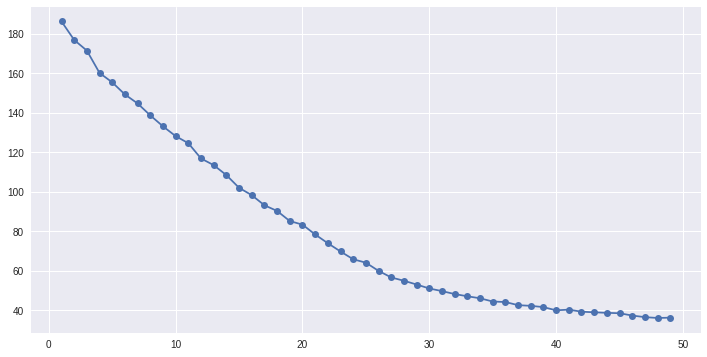

In [71]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" );

In [76]:
clusters = KMeans( 40 )
clusters.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=40, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [79]:
data['clusters']=clusters.predict(x)

In [80]:
data.head()

,id,qid1,qid2,question1,question2,is_duplicate,clusters
278068,278068,397286,397287,Are writing skills more important than speakin...,Think of a time when you are found yourself in...,0,32
319151,319151,30753,190899,What are the strongest majors in terms of job ...,What are the strongest majors in terms of job ...,0,11
354936,354936,45723,484118,How grammarly.com work?,How does pointerpointer.com work?,0,31
35702,35702,65201,65202,Indian consumer spending pattern (industry lev...,If someone's always trying to show off the amo...,0,0
241640,241640,353672,353673,What is the best music for a pilates workout?,What is the best workout method?,0,2


In [83]:
import numpy as np # linear algebra
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS

#mpl.rcParams['figure.figsize']=(8.0,6.0)    #(6.0,4.0)
mpl.rcParams['font.size']=12                #10 
mpl.rcParams['savefig.dpi']=100             #72 
mpl.rcParams['figure.subplot.bottom']=.1 


stopwords = set(STOPWORDS)


In [84]:
clusterlist=list(data.clusters.unique())

In [ ]:
clusterlist=sorted(clusterlist)
plt.figure(figsize=(len(clusterlist)/2,2 ))
row=0
col=0
for index in clusterlist:
    wordcloud = WordCloud(    background_color='white',
                              stopwords=stopwords,
                              max_words=200,
                              max_font_size=40, 
                              random_state=42
                             ).generate(str(data.loc[data.clusters==index,'question1']))
    #sub = plt.subplot((row,col))
    fig=plt.figure(1)
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
#     col=int(not col)
#     if not col:
#         row+=row
    #axarr[]plt.show()
    #fig.savefig("word1.png", dpi=900)
plt.show()